# 问题

1. 逻辑回归的问题
    - $y = S( xW)$ ，其中y是概率；
        - 逻辑回归，分类的效果，实际还是线性。（绘制图形，分类边界线：直线）：属于线性回归；
        - 输出概率：正分类概率（属于A概率），负分类概率（属于B概率）
            - y只输出一个概率。就算正分类概率：99.99% 负分类概率（99.999%）
                - p(A) + p(B) =1 p(A)>=0.5 可以做结论。
            - 标签进行改造：
                - A = 0    :     `[1,  0]`
                - B = 1    :     `[0,  1]`
                
            - 训练：
                - $p =  [p_a, p_b]$    
                    - $p_a \gt   p_b ,\qquad   x \in A \text{类}$

2. 一个不能线性可分的例子

100


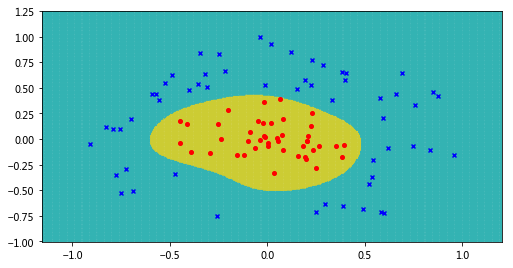

array([-1., -1., -1., ..., -1., -1., -1.])

In [73]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn  as sk
import pandas as pd
from sklearn.svm  import SVC
from  matplotlib.colors import ListedColormap    
from sklearn.linear_model import LogisticRegression

# 样本集的该要信息（可视化）

# 1. 读取数据样本
data = pd.read_csv('train_data.csv')
# 对数据分成-1，1两类
# data['label'] == 1.0
data_1 = data[data['label'].isin([1.0])]
data_2 = data[data['label'].isin([-1.0])]
# -----------------
# 训练特征（2个特征：列）样本
X = data[['feature1', 'feature2']]
# 训练标签
Y =data['label']
# 使用sklearn创建SVM分类器SVC
classfier = SVC(C=1, gamma=10)    # SVM分类器
# classfier = LogisticRegression()
# 开始训练
classfier.fit(X,Y)    # 训练过程中得到一些参数。
# 预测(使用训练集作为预测样本)
predict = classfier.predict(X)   # 得到的结果就是分类结果
print((predict == data['label']).sum())
# -----------------
# 2. 可视化
figure = plt.figure('SVM', figsize=(8,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
# ===================
# 使用颜色把分类的区域标识出来（达到3维信息的可视化效果）
# 把数据所在范围：分成若干行与列，每个行列的交叉点当成样本数据，
# 这个样本数据在上面的训练结果下有一个预测值，这个预测值使用不同颜色绘制出来，就形成区域
# 1. 对数据x，y方向取最大值与最小值
# 取两个特征的数据值
x1 = X['feature1']
x2 = X['feature2']
# 最两个坐标轴定位最大最小值
x1_min, x1_max = x1.min(), x1.max()    # x轴
x2_min, x2_max = x2.min(), x2.max()  # y轴
# 放大
x1_min -= 0.25
x1_max += 0.25
x2_min -= 0.25
x2_max += 0.25
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
# 2. 把最小与最大之间划分成n个等差数列值。
x1_grid,  x2_grid = np.mgrid[x1_min: x1_max: 400j, x2_min: x2_max: 400j]   # 根据类似切片的数据描述分成n等分
# 3. 形成n*n的坐标（表示一样笨）列表
# 把数据变成一维
x1_flat = x1_grid.flat    # 2维变1为
x2_flat = x2_grid.flat

# 形成网格坐标
grid_plane =np.stack((x1_flat, x2_flat), axis=1)  # 对应映射，形成坐标（是一个矩阵）
# 4. 列表中的每个坐标在训练模型下，就有一个输出值（分类）
grid_predict = classfier.predict(grid_plane)

# 5. 根据输出值，直接绘制颜色（,atplotlib中Axes提供一个函数绘制这种图形）pcolormesh 像素颜色网格图ax.pcolormesh
#  grid_predict的数据是1维，变成对应的坐标格式：与x1_grid，x2_grid形状。

ax.pcolormesh(x1_grid, x2_grid, grid_predict.reshape(x1_grid.shape),  cmap=ListedColormap([ (0.2, 0.7, 0.7, 0.7),(0.8, 0.8, 0.2, 0.7)]))
# ===================
ax.scatter(data_1['feature1'], data_1['feature2'], c='r', s=16, marker='o')
ax.scatter(data_2['feature1'], data_2['feature2'], c='b', s=16, marker='x')

plt.show()
grid_predict

- 注释：
    - 实现逻辑回归，这两类样本不可分的。
    
    - 算法的掌握程度：
        - 利用sklearn，tensorflow调用算法函数；
        - 调整参数
            - 用参：理解参数的含义：控制参数达到我的目标；
            - 调参：训练参数：机器训练得到最佳参数
           
        - 在别人的算法基础上，设计算法
            - 设计算法（根据业务数据，选择算法改进）
            - 实现算法
            
        - 创新算法

3. 使用SVM的不可分的效果

# SVM的模型

## 问题的出发点

- 从分类的另外角度来谈起

- 逻辑回归的不足或者逻辑回归的优化

    - 使用逻辑回归分类
        - 使用鸢尾花的数据来进行分类；（鸢尾花取2个特征：特征1，特征2（花萼宽度与长度）| 特征3，特征4（花瓣宽度与长度） ）

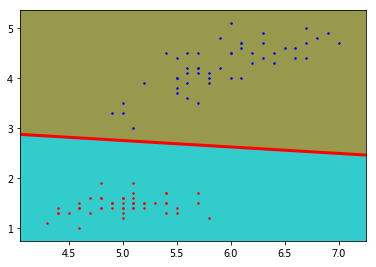

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [116]:
% matplotlib inline
import numpy as np
import sklearn.datasets as ds     # 鸢尾花数据集
from sklearn.linear_model import LogisticRegression   # 逻辑回归
import matplotlib.pyplot as plt    
from matplotlib.colors import ListedColormap    # 颜色列表


# 1. 加载鸢尾花数据
data, target = ds.load_iris(return_X_y=True)

X = data[0:100, ::2 ]   # 取100个样本（A类与B类），2个特征（花瓣的高度，花萼的高度）
Y = target[0:100]
# 3. 使用逻辑回归分类
classfier = LogisticRegression(solver='lbfgs')   # 默认参数

# 训练数据
classfier.fit(X,Y)

# 预测
X_pre = classfier.predict(X)   # 100%的正确率（正确率无法完全说明训练效果的好坏：精准率 + 召回率）



# 2. 可视化鸢尾花数据（50 + 50 = 100）
figure = plt.figure('逻辑回归', figsize=(6, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
# 4. 可视化分类效果
# ====================
# x轴，y轴均等n等分
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
# 放大
x1_min -= 0.25
x1_max += 0.25
x2_min -= 0.25
x2_max += 0.25

ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)
# 绘制的坐标点
x1_grid , x2_grid = np.mgrid[x1_min: x1_max: 1000j, x2_min: x2_max: 1000j] 

grid_plane = np.stack( (x1_grid.flat,  x2_grid.flat), axis = 1)   # 一维

# 根据坐标点，得到分类结果
c = classfier.predict(grid_plane)   # 分类（0，1），绘制时候，根据0，1选择样本的显示颜色
# c的形状与x1_grid同型
c = c.reshape(x1_grid.shape)

colors = ListedColormap([(0.2, 0.8, 0.8), (0.6, 0.6, 0.3)])

ax.pcolormesh(x1_grid, x2_grid, c, cmap=colors )

# 形成坐标系网格模拟样本

# 使用上面训练结果，得到模拟样本的分类结果

# 使用颜色标识出来

# ====================
ax.scatter(X[:50, 0], X[:50, 1], c='r', s=9, marker='.')  # 前面50个A类数据
ax.scatter(X[50:, 0], X[50:, 1], c='b', s=9, marker='.')  # 后面50个B类数据

# 可视化逻辑回归的直线

coef = classfier.coef_
intercept = classfier.intercept_

# 按照x轴取1000个点
xx = np.linspace(x1_min, x1_max,1000)
#  表达分类直线
line = lambda x: - ( coef[0,0] * x + intercept) /  (coef[0, 1]) 

yy = line(xx)

ax.plot(xx,yy, color=(1,0,0,1), linewidth=3 )

plt.show()

X_pre

- 问题：
    - 分类直线是不确定的。
    - 过拟合现象。

- 思路：
    - 找一条直线，分类样本，这条直线未必一定按照分类的概率模型寻找，也可以按照几何方式查找。
    
    
- 线性分类平面：
    - $xW+b=0$     


- 决策函数：
    - $y=sign(xW+b)$     
        - |- 1:分类AB    
        - |- 2：分类C
        
        - 根据标签决定

- 新的思路：（找到一个标准，唯一确定一条直线）
    - 找一条直线
        - 直线：均分（）
        - 直线：唯一（斜率）
 
- 给定两个样本集
    - 找到距离的度量方式，计算两个样本集的距离
        - 距离最短（定义距离）
        
    - 根据距离的定义方式，找到一条垂直直线，垂直直线就是分类先。
    - 计算最大的距离
        - 垂直线过最小距离平分点的直线就是分类线。

- 距离的定义
    - 假设直线存在
        - $y = xW$
    - 距离的定义
        - 每个点到直线的距离做成度量的数据（垂直距离）
    - 损失标准
        - 样本集到直线的距离：最大。
        - 这样直线是唯一的。

- 思路：
    - 垂直距离
        

## 数据基础的推导

- 点到直线的距离表达
    1. 直线的表示
        - 丢弃这种类型的直线标识：$y = xW$
        
        
        - 从分类的角度：$0 = xW $：分类直线
            - $xW>0$：直线上部分
            - $xW<0$：直线下部分
            - $xW=0$：在直线上
            
            
    2. 距离的表达
- 直线：$xW = 0, W = [w_1,w_2,\dots,w_n] ^T $
- 点：$x^ \prime = [x_1,x_2,\dots,x_n]$

- $d= \dfrac{| x_1w_1 + x_2w_2 + \dots + x_nw_n |}{\sqrt{w_1 ^2 + w_2 ^2 + \dots+ w_n^2}}$

- $d= \dfrac{| x_1w_1 + x_2w_2 + \dots + x_nw_n |}{||W||_2}$

- 在欧氏空间中2范数的**定义**$||W||_2 =\sqrt{w_1 ^2 + w_2 ^2 + \dots+ w_n^2} $

- $d= \dfrac{1}{ \dfrac{|n*|W||_2}{| x_1 n*w_1 + x_2n*w_2 + \dots + x_n n*w_n |}}$

- 假设$| x_1w_1 + x_2w_2 + \dots + x_nw_n | = n$

- 为了简化，记支撑点最近的距离为1.  $d= \dfrac{1}{||W||_2}$

    - 实际上，点到直线的几何距离是20还是1，不影响分类。
   

- 问题：（支撑向量Support Vector Machine： Support Vector Classfier ：SVC）
   - 找到$W$，使得，支撑向量（样本中到直线的最大距离的样本），到直线的距离是$\dfrac{1}{||W||_2}$.（不仅仅找$W$，而且是个规范化的$W$） 
   - 找到$W$，使得两个样本集的支撑向量的距离为$\dfrac{2}{||W||_2}$，而且是最大.

## SVM的模型

- 分类模型
    - 找到$W$满足：
        - $o = xW $
            - |- o=-1  :属于A类
            - |- o= 1   :属于B类

- 损失模型：
    - 这个W必须满足 $\dfrac{1}{||W||_2}$最大，  $ s.t. y (xW)= 1$:分类正确

- x = `-0.214824,0.662756`     -1   1
- y= `-1.000000`
    - W
    - y (xW)  =1
    
- x = `-0.061569,-0.091875`
- y= `1.000000`
    - W 
    - y(xW) =1

# SVM模型求解与推导

- 找到一个平面，使得训练样本正确分类，同时使得支撑向量到平面的几何距离最大。

- 问题：
    - 条件最大的求解是非常痛苦。
        - 提出数学理论，找到等价的线性求解公式。



- 条件最大->代数最大
    - ** 拉格朗日乘数定理 **
    
    - 如果： 代数最大 + 条件
        - 【代数 +  （系数 * 条件）求和  】  最大： 系数必须大于0 ：拉格朗日乘数
      

- SVM在拉格朗日乘数表示：
    - 求公式$ f(W) = \dfrac{1}{||W||_2}  +   \sum \limits _{i=1} ^{n} \alpha _i  (y_i (x_i W)- 1)  $最大
    
    - 求最小：
        - $ f(W) =\dfrac{1}{2} ||W||_2 -  \sum \limits _{i=1} ^{n} \alpha _i  (y_i (x_i W)- 1)  $最小

- 损失函数表示为：
    - $L(W, \alpha)=\dfrac{1}{2} ||W||_2 -  \sum \limits _{i=1} ^{n} \alpha _i  (y_i (x_i W)- 1)  $
    - 固定$\alpha$，$L(W, \alpha)=\dfrac{1}{2} ||W||_2 -  \alpha \sum \limits _{i=1} ^{n}  (y_i (x_i W)- 1)  $
    - 固定$\alpha$，$L(W, \alpha)= \alpha (\dfrac{1}{2} ||W||_2 - \sum \limits _{i=1} ^{n}  (y_i (x_i W)- 1))  $

- 距离：
    - 欧氏距离
    - 其他距离

- 求解
    - 假设：$\alpha_i= 常量$ ：问题就可以使用梯度下降法求解。
    - 如果$\alpha_i$如果不假设为常量，则需要通过数学推导，得到求解算法：SMO

- 算法的种类：
    - 基础算法（搜索，排序, .......）
        - 直接基于容器算法
    - 求值算法（数学推导，逻辑推导）
        - 求解（数值分析/数值计算）
    - 智能算法：机器学习算法：监督学习（预测，分类），无监督（K-Means，规则关联，PCA），半监督学习（马尔可夫链），强化学习
        - 解决问题
        
        - 机器学习中的最成功的算法：神经网络
            - 深度神经网络（深度学习）

# Tensorflow

## Tensorflow的基本编程模式（套路）

- 图模式（张量Tensor流flow（Tensorflow）：计算节点的图：张量描述：张量：常量（参数），变量（训练系数），占位量）【非交互式】
- 实时模式（直接计算，马上输出）：交互式计算模式

- 固定参数：常量
- 训练参数：变量
- 输入数据：占位符

- 按照算法啊，使用张量，实现算法实现

- 执行：
    - 初始化变量
    - 执行操作

In [23]:
import numpy as np
import tensorflow as tf
import sklearn.datasets as ds
"""
Session的构造器
__init__(
    target='',
    graph=None,
    config=None
)


tf.constant(
    value,
    dtype=None,
    shape=None,
    name='Const',
    verify_shape=False
)
# tf.Variable
__init__(
    initial_value=None,
    trainable=True,
    collections=None,
    validate_shape=True,
    caching_device=None,
    name=None,
    variable_def=None,
    dtype=None,
    expected_shape=None,
    import_scope=None,
    constraint=None,
    use_resource=None,
    synchronization=tf.VariableSynchronization.AUTO,
    aggregation=tf.VariableAggregation.NONE
)

tf.placeholder(
    dtype,
    shape=None,
    name=None
)

run(
    fetches,      # 操作
    feed_dict=None,  站位符的数据
    options=None,
    run_metadata=None
)
"""
#  1. 构建执行会话环境
session = tf.Session()


# ---------------描述
#  2. 描述量(常量，变量，占位符)

# 常量
a = tf.constant(5.0)
b = tf.constant(15.0)

# 变量
v = tf.Variable(30.0)
u = tf.Variable(56.0)

# 站位符

x = tf.placeholder(tf.float32, shape=None)   # 标量
# x = tf.placeholder(tf.float32, shape=[None, ] )   #  变长数组（输入数据）


#  3. 描述操作(遵循规则)
c = a + x

#  --------------计算
#  4. 初始化所有量
all_vars = tf.initializers.global_variables()    # 跟踪变量（与常量无关）

re = session.run(all_vars)

# 5. 执行操作（输入条件，输出结果）
re = session.run(c, feed_dict={x: 30.0})
print(re)


35.0


## 线性回归tensorflow的实现

### 线性回归的算法：

- $ W = (X^T X)^{-1}X^T Y$

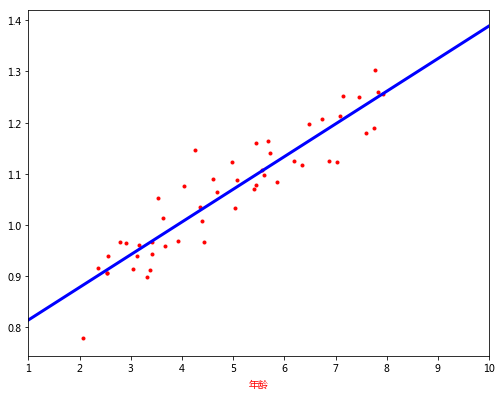

In [38]:
# 引入模块环境
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 1. 描述变量(值需要定义两个占位符X, Y)
X = tf.placeholder(dtype=tf.float32, shape=[None, 2])   # 数据是一维，加上解决 1
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# 2. 描述线性回归(线性求解公式)
S1 = tf.transpose(X)     # 转置
S2 = tf.matmul(S1, X)    # 内积
S3 = tf.matrix_inverse(S2)   # 逆矩阵
S4 = tf.matmul(S3, S1)    # 内积
W = tf.matmul(S4, Y)   # 内积


# 3. 构造会话环境
session = tf.Session()

# 4. 初始化变量
all_vars = tf.global_variables_initializer()
session.run(all_vars)
# 5. 执行操作，得到结果（训练的线性系数）
# 加载数据(数据格式：特别注意)
x_data = np.loadtxt('ex2x.dat')
y_data = np.loadtxt('ex2y.dat')

# 数据格式化
x = np.zeros(shape=[x_data.shape[0], 2] , dtype=np.float32)
x[:, 0] = x_data
x[:, 1] = 1 

y = y_data.reshape([y_data.shape[0], 1])

w = session.run(
    W, 
    feed_dict={
        X: x,
        Y: y
    }
)

# 6. 可视化分类效果（使用训练集看效果）
figure = plt.figure('Tensorflow实现', figsize=(8, 6))
ax = figure. add_axes([0.1, 0.1, 0.8, 0.8])

# 可视化样本点
ax.scatter(x_data, y_data, s=3**2, color='#FF0000' )
ax.set_xlim(1, 10)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xlabel('年龄',color=(1,0,0,1))

# 可视化预测直线
line_space = np.linspace(1,10, 100)
line_x = np.zeros(shape=[100, 2] , dtype=np.float32)
line_x[:, 0]=line_space
line_x[:,  1] =1
line_y = np.matmul(line_x, w)
ax.plot(line_space, line_y, color='#0000FF', linewidth=3)

plt.show()

## 逻辑回归tensorflow的实现

- 随机梯度下降：
    - 分类模型
        - $y = S(xW)$
    - 损失模型(交叉熵)
        - $L(W) = \sum (y_1 log y_2 + (1-y_2) log(1-y_1) )$

- Tensorflow封装编程模式
    - 在分类模型下，损失函数最小
         - 分类模型 + 训练样本的标签 -> 损失函数
         - 优化器，使得损失函数最小（学习率）

In [37]:
s = """
tf.losses.sigmoid_cross_entropy(
    multi_class_labels,    # 训练样本的标签y（已知的分类）
    logits,   # 使用逻辑回归分类模型计算出来的y
    weights=1.0,
    label_smoothing=0,
    scope=None,
    loss_collection=tf.GraphKeys.LOSSES,
    reduction=Reduction.SUM_BY_NONZERO_WEIGHTS
)

#  tf.train.GradientDescentOptimizer  
__init__(
    learning_rate,        # 学习率
    use_locking=False,   
    name='GradientDescent'
)

minimize(
    loss,                          # 损失函数
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)

# S函数
tf.math.sigmoid(
    x,
    name=None
)
"""

In [61]:
import numpy as np
import sklearn.datasets as ds
import tensorflow as tf

# 鸢尾花

FEATURE_NUM = 4    # 训练数据的特征
OUTPUT_NUM = 1     # 输出特征（唯一分类样本的特征）
# 1. 描述量（分类模型，损失函数，优化器）
# 1.1.  y_o = S(xW+b)
# 1.2. loss = f(y_o,  y)
# 定义输入（样本集合，样本标签）
x = tf.placeholder(dtype=tf.float32, shape=[None, FEATURE_NUM])
y = tf.placeholder(dtype=tf.float32, shape=[None, OUTPUT_NUM])

# w，b需要训练得到（首先初始化一个数据）: 常量
w_v = tf.random_uniform(shape=[FEATURE_NUM, OUTPUT_NUM] , minval=-0.01, maxval=0.01, dtype=tf.float32)
b_v = tf.random_uniform(shape=[OUTPUT_NUM], minval=-0.01, maxval=0.01, dtype=tf.float32)

w = tf.Variable(w_v)     # 变量才可训练
b = tf.Variable(b_v)
# 2. 描述操作（分类模型，损失函数描述，优化器描述）
y_o = tf.matmul(x, w) + b    # 线性输出

# 预测输出(概率输出)
y_p = tf.sigmoid(y_o)

# 损失函数
loss = tf.losses.sigmoid_cross_entropy(y, y_o)     # 可以使用y_p

# 定义优化器
optimizer = tf.train.GradientDescentOptimizer(0.02)
# 训练操作
trainer = optimizer.minimize(loss)

# 3. 构建tensorflow执行环境
session = tf.Session()

# 4. 初始化全局变量
all_vars = tf.initializers.global_variables()
session.run(all_vars)

# 5. 执行算法
# 训练\
data, target = ds.load_iris(return_X_y=True)
X = data[0:100, :]   # 取前面两类鸢尾花
Y = target[0:100]

# 一定要确保：输入数据与占位符shape保持一致
Y = Y.reshape( (Y.shape[0],  OUTPUT_NUM))

train_num =1000
for i in range(train_num):
    session.run(trainer, feed_dict={x:X, y:Y})    # 随机（不使用所有样本，而是使用样本的一部分）梯度
    # 获取训练以后w与b
    re_w = session.run(w)
    re_b = session.run(b)
    re_loss = session.run(loss, feed_dict={x: X, y: Y})
#     print(F'第{i:04d}次训练:',re_w.T, '\t', re_loss)


In [60]:
# 分类预测
pre = session.run(y_p,feed_dict={x: X})
# print(pre[0:50])
# print('------------')
# print(pre[50:100])
# 6. 可视化

- 随机梯度
    

In [69]:
import numpy as np
import sklearn.datasets as ds
import tensorflow as tf

# 鸢尾花

FEATURE_NUM = 2    # 训练数据的特征
OUTPUT_NUM = 1     # 输出特征（唯一分类样本的特征）
# 1. 描述量（分类模型，损失函数，优化器）
# 1.1.  y_o = S(xW+b)
# 1.2. loss = f(y_o,  y)
# 定义输入（样本集合，样本标签）
x = tf.placeholder(dtype=tf.float32, shape=[None, FEATURE_NUM])
y = tf.placeholder(dtype=tf.float32, shape=[None, OUTPUT_NUM])

# w，b需要训练得到（首先初始化一个数据）: 常量
w_v = tf.random_uniform(shape=[FEATURE_NUM, OUTPUT_NUM] , minval=-0.01, maxval=0.01, dtype=tf.float32)
b_v = tf.random_uniform(shape=[OUTPUT_NUM], minval=-0.01, maxval=0.01, dtype=tf.float32)

w = tf.Variable(w_v)     # 变量才可训练
b = tf.Variable(b_v)
# 2. 描述操作（分类模型，损失函数描述，优化器描述）
y_o = tf.matmul(x, w) + b    # 线性输出

# 预测输出(概率输出)
y_p = tf.sigmoid(y_o)

# 损失函数
loss = tf.losses.sigmoid_cross_entropy(y, y_o)     # 可以使用y_p

# 定义优化器
optimizer = tf.train.GradientDescentOptimizer(0.1)
# 训练操作
trainer = optimizer.minimize(loss)

# 3. 构建tensorflow执行环境
session = tf.Session()

# 4. 初始化全局变量
all_vars = tf.initializers.global_variables()
session.run(all_vars)

# 5. 执行算法
# 训练\
data, target = ds.load_iris(return_X_y=True)
X = data[0:100, 0::2]   # 取前面两类鸢尾花
Y = target[0:100]

# 一定要确保：输入数据与占位符shape保持一致
Y = Y.reshape( (Y.shape[0],  OUTPUT_NUM))

epoch =1000
batch = 10
batch_num = len(X) // batch

for ep in range(epoch):
    # 对样本洗牌
    # XY_ = np.random.permutation(zip(X,Y)）
    # 分成10次训练，每次10个样本
    for  n in  range(batch_num):
        session.run(trainer, feed_dict={x: X[n*batch: (n+1)*batch],  y:Y[n*batch: (n+1)*batch] })
    
    if (ep+1)% 200 == 0:
        re_w = session.run(w)
        re_b = session.run(b)
        re_loss = session.run(loss, feed_dict={x: X, y: Y})
        print(F'第{ep+1:04d}次训练:',re_w.T, '\t', re_loss)
        if  re_loss < 10e-5:
            print('损失精度已经合格，结束训练')
            break;
    



第0200次训练: [[-2.2649932  4.8585267]] 	 0.007865484
第0400次训练: [[-2.6091347  5.595785 ]] 	 0.004390023
第0600次训练: [[-2.8163803  6.0450683]] 	 0.0031323617
第0800次训练: [[-2.9667864  6.372842 ]] 	 0.0024674728
第1000次训练: [[-3.0855992  6.6325393]] 	 0.0020512214


In [80]:
# 分类预测
pre = session.run(y_p,feed_dict={x: X})
re_w = session.run(w)
re_b = session.run(b)

[-1.2160509]


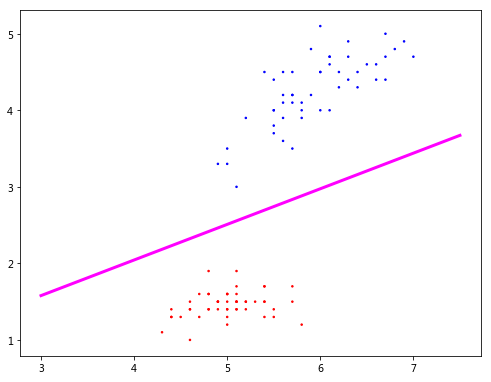

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlb 

figure = plt.figure('逻辑回归鸢尾花可视化', figsize=(8, 6))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])

colors = mlb.colors.ListedColormap([(1, 0, 0, 1), (0, 0, 1, 1)])
# 可视化样本点
# 可视化分类边界（分类直线，区域, 对不同的输出值使用不同的颜色可视化）
ax.scatter(X[:,0], X[:,1], s=3**2, marker='.', c=pre[:,0], cmap=colors)   # mlb.cm.get_cmap('cool')
# 分类实现可视化
print(re_b)
xx = np.linspace(3, 7.5, 100)
yy =- (xx * re_w[0, 0]  + re_b[0])/ re_w[1, 0]

ax.plot(xx,yy, color=(1,0,1,1) ,linewidth=3)

plt.show()

## SVM的拉格朗日系数固定的情况的算法实现

- 梯度下降
    - 分类模型的函数
    - 损失模型的函数

- 提示
    - 下面的SVM的算法，实际是固定$\alpha$的梯度下降，严格意义不是SMO。
    - 固定$\alpha$，$L(W, \alpha)= \alpha (\dfrac{1}{2} ||W||_2 - \sum \limits _{i=1} ^{n}  (y_i (x_i W)- 1))  $

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as ds
import tensorflow as tf


# 描述量
alpha = tf.constant([1.0])
# 输入数据
x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None,  1], dtype=tf.float32)

w = tf.Variable(tf.random_normal(shape=[2, 1]))   # 权重随机取值
b = tf.Variable(tf.random_normal(shape=[1, 1])) 

# 描述操作
# 分类模型（线性分类模型）
y_o = tf.add(tf.matmul(x, w) , b)

# 损失函数模型
l2 = tf.reduce_sum( tf.matmul(w, tf.transpose(w)) ) /2.0
# l2 = tf.reduce_sum(tf.square(w)) / 2.0
# o_sum = y_o * y
o_sum =   tf.reduce_sum(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(y_o, y))))    # 绝对值
# o_sum =   tf.reduce_sum(tf.subtract(1.0, tf.multiply(y_o, y)))  
loss = tf.add(l2, tf.multiply(alpha , o_sum))


# 训练算法
optimizer = tf.train.GradientDescentOptimizer(0.01)
trainer = optimizer.minimize(loss)

# 构建一个环境
session =tf.Session()
# 初始化变量
all_vars = tf.global_variables_initializer()
session.run(all_vars)

# 执行训练过程
data, target = ds.load_iris(return_X_y=True)

# def F(P):
#     # 函数运算
#     return P

X = data[50:150, [0,2]]    # 1::2
# X = F(X)
Y =target[0:100]   # 值0，1，改变成-1，1
Y[Y==0] = -1
Y = Y.reshape(Y.shape[0], 1)

epoch = 10000
for i in range(epoch):
    session.run(trainer, feed_dict={
        x: X,
        y: Y
    })

w_ = session.run(w)
b_ = session.run(b)
print(w_.T, b_)

[[-15.017571  21.01386 ]] [[-11.631323]]


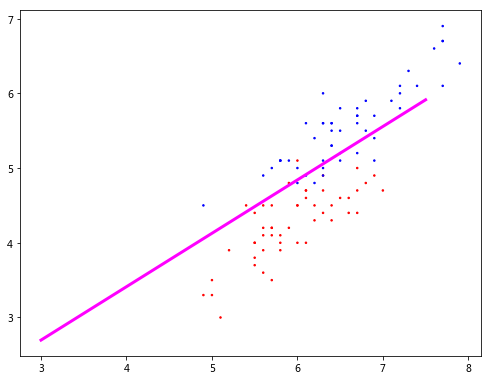

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlb 

figure = plt.figure('逻辑回归鸢尾花可视化', figsize=(8, 6))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])

colors = mlb.colors.ListedColormap([(1, 0, 0, 1), (0, 0, 1, 1)])
# 可视化样本点
# 可视化分类边界（分类直线，区域, 对不同的输出值使用不同的颜色可视化）
ax.scatter(X[:,0], X[:,1], s=3**2, marker='.', c=pre[:,0], cmap=colors)   # mlb.cm.get_cmap('cool')
# 分类实现可视化
xx = np.linspace(3, 7.5, 100)
yy =- (xx * w_[0, 0]  + b_[0])/ w_[1, 0]

ax.plot(xx,yy, color=(1,0,1,1) ,linewidth=3)

plt.show()

# SVM软件距离

&emsp;&emsp;引入软距离来修正SVM优化问题。   
&emsp;&emsp;&emsp;&emsp;|-找到分类平面，使得$ \frac{1}{2}||W||_2^2 +C\sum\limits_{i=1}^{m}\xi_i$最小     
&emsp;&emsp;&emsp;&emsp;|-同时满足约束条件：     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-条件一：$ y_i(x_i W + b)  \geq 1 - \xi_i \;\;(i =1,2,...m)$           
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-条件二：$\xi_i \geq 0 \;\;(i =1,2,...m)$   

# SVM非线性可分

- 低维投射高维空间
    - 投射函数：Kernel（核）